In [1]:
from sklearn import manifold, datasets
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

data = pd.read_csv("../../../3ormoreDATLOW.csv",index_col=0)
data.loc[data['class'] == 2.0, 'class'] = -1.0 #consider CIMP-Low to be with negative class
data.insert(0,column='0',value=data.iloc[:,-1].tolist()) #move classification to front

#one data set will have only foreground
datapos = data[data['0'] == 1.0]
data = data.drop(columns=['class']) #this column has been moved
datapos = datapos.drop(columns=['class'])

#number cols/indices to make easier to index
data.columns = range(0,data.shape[1])
data.index = range(0,data.shape[0])
datapos.columns = range(0,datapos.shape[1])
datapos.index = range(0,datapos.shape[0])

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
9,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Random jitter and creating MDS

### The random jitter function is used to add small variance to points in a given array, so that overlapping data points are more clear when plotting

In [2]:
# below function takes a list of floats and adds small variance to the points
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# make MDS for all data
my_scaler = manifold.Isomap(n_jobs=-1)
my_new_data = my_scaler.fit_transform(data[data.columns[1:]])

# make MDS for just positive samples
my_scalerPos = manifold.Isomap(n_jobs=-1)
my_new_dataPos = my_scaler.fit_transform(datapos[datapos.columns[1:]])


my_new_data

array([[ -2.17932890e-01,  -2.06729503e-01],
       [  4.97335389e+00,   7.62739471e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [  4.96008515e+00,  -4.70561606e-03],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.25614906e+00,   5.65683151e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [  6.57952257e+00,   6.05764257e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -6.27510650e-01,  -2.21288023e+00],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -2.17932890e-01,  -2.06729503e-01],
       [  4.16546679e+00,   1.77869320e+00],
       [ -2.17932890e-01,  -2.06729503e-01],
       [ -1.09390681e-02,  -9.44215583e-01],
       [ -

# Plot data of positive and negative classes

Text(0,0.5,'Second Dimension')

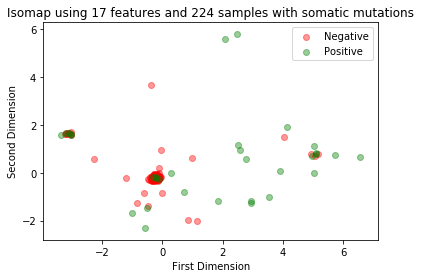

In [3]:
colors =['red','green'] 

plt.figure() #init plot
for color, i, target_name in zip(colors, [-1,1], ["Negative","Positive"]):
    #plot the points at 0th (x) and 1st (y) elements across 2d array of point coords
    plt.scatter(rand_jitter(my_new_data[data[0] == i, 0]), rand_jitter(my_new_data[data[0] == i, 1]), color=color, alpha=.4, lw=1, label=target_name)

#set up legend, title, axis labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Isomap using 17 features and 224 samples with somatic mutations")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")

# Plotting positive samples (CIMP-High only)

Text(0,0.5,'Second Dimension')

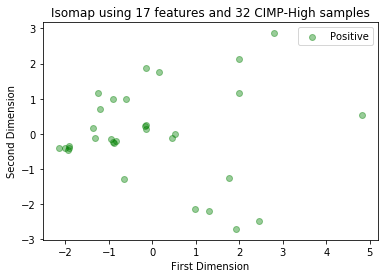

In [4]:
#same as before, copy/paste w some bits deleted to work for only one class

colors =['green']

plt.figure()
for color, i, target_name in zip(colors, [1], ["Positive"]):
    #note I use my_new_dataPos here instead of my_new_data. This contains the data w/ only cimp-high.
    plt.scatter(rand_jitter(my_new_dataPos[datapos[0] == i, 0]), rand_jitter(my_new_dataPos[datapos[0] == i, 1]), color=color, alpha=.4, lw=1, label=target_name)

#set up legend, title, axis labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Isomap using 17 features and 32 CIMP-High samples")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")

# Create 3D MDS models

In [5]:
# make 3D MDS for all data
my_scaler = manifold.Isomap(n_jobs=-1, n_components=3) # note here: n_components=3
my_new_data = my_scaler.fit_transform(data[data.columns[1:]])

# make 3D MDS for just positive samples
my_scalerPos = manifold.Isomap(n_jobs=-1, n_components=3)
my_new_dataPos = my_scaler.fit_transform(datapos[datapos.columns[1:]])


my_new_dataPos

array([[-0.21907978,  0.19361284, -0.82245431],
       [ 0.51610228, -0.13184429, -2.86537229],
       [-1.26184616,  0.77443397, -1.1542215 ],
       [-0.91314002,  0.96486288,  1.49535906],
       [-0.26145977,  1.7972163 , -1.64731612],
       [-0.57372412,  0.93077806, -0.26156875],
       [-0.21907978,  0.19361284, -0.82245431],
       [ 1.86263131, -2.73861642,  0.19513777],
       [ 1.36567463, -2.15657655,  0.78409025],
       [ 4.83432293,  0.5168833 , -0.39344425],
       [ 0.21873838,  1.77622249, -1.09526646],
       [ 1.7809509 , -1.24894709, -1.23141322],
       [-0.91442294, -0.22724557,  0.25123809],
       [ 0.69699807,  0.02278767,  2.07763265],
       [-1.95748088, -0.35883331,  0.42343114],
       [ 2.45144426, -2.52590922,  0.81653569],
       [-1.95748088, -0.35883331,  0.42343114],
       [ 2.85825101,  2.86288784,  0.94383942],
       [ 2.03105043,  1.27463522,  0.36676785],
       [-1.95748088, -0.35883331,  0.42343114],
       [-1.29114073,  0.23176159,  0.585

# Plot 3D MDS with all classes

Text(0.5,0.92,'Isomap - Using 17 Features with 3 or more CIMP-High')

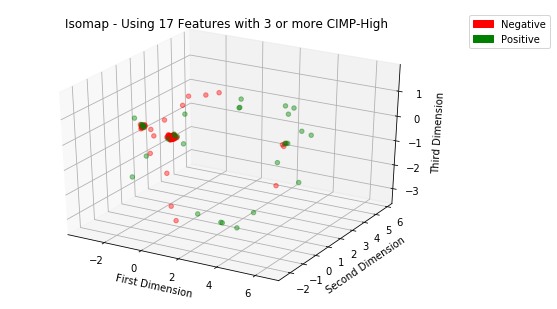

In [6]:
fig = plt.figure()
ax = Axes3D(fig)

colors =['red','green']

for color, i, target_name in zip(colors, [-1,1], ["Negative","Positive"]):
    #the different thing here is that we plot a z coordinate: my_new_data[data[0] == i, 2]
    ax.scatter(rand_jitter(my_new_data[data[0] == i, 0]), rand_jitter(my_new_data[data[0] == i, 1]), rand_jitter(my_new_data[data[0] == i, 2]), color=color, alpha=.4, lw=1, label="target_name")    

#mpatches is just a manual way of setting the legend. here I make 2 entries, one red and one green
mypatches = [mpatches.Patch(color='red', label='Negative'), mpatches.Patch(color='green', label='Positive')]
ax.legend(handles=mypatches, bbox_to_anchor=(1.05, 1), loc=2)

#again, set axes labels and title
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
ax.set_title("Isomap - Using 17 Features with 3 or more CIMP-High")

# Plot 3D MDS of only positive class

Text(0.5,0.92,'Isomap - Using 17 Features with 3 or more CIMP-High')

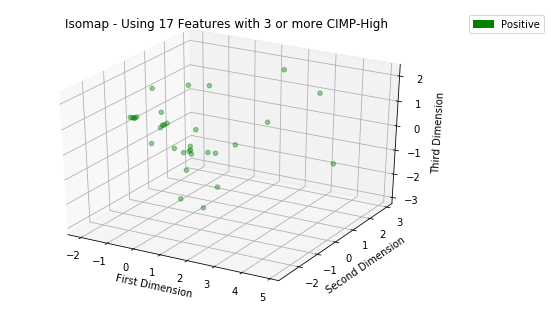

In [7]:
fig = plt.figure()
ax = Axes3D(fig)

colors =['green']

for color, i, target_name in zip(colors, [1], ["Positive"]):
    ax.scatter(rand_jitter(my_new_dataPos[datapos[0] == i, 0]), rand_jitter(my_new_dataPos[datapos[0] == i, 1]), rand_jitter(my_new_dataPos[datapos[0] == i, 2]), color=color, alpha=.4, lw=1, label="target_name")    

mypatches = [mpatches.Patch(color='green', label='Positive')]
ax.legend(handles=mypatches, bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
ax.set_title("Isomap - Using 17 Features with 3 or more CIMP-High")